# Explaining Political Polarization
# Mariam Arzumanyan
## Simulating Generalized Bates Distribution

In [1]:
# Import all necessary modules
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import scipy.special as sc
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy import integrate

In [2]:
plt.style.use('classic')
%matplotlib inline

sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')


The Bates distribution ( Bates (1955), Kotz (2004)}) is the continuous probability distribution of the mean of $n$ independent, uniformly distributed, random variables on the unit interval $(a,b)$:
\begin{equation}\label{eq:batesab}
    X_{(a,b)}=\frac{1}{n}\sum_{k=1}^nU_k(a,b). 
\end{equation}
For the $[0,1]$ interval, the Bates distribution has the following probability density function:
\begin{equation}\label{bates01pdf}
    f_X(x;n)=\frac{n}{(n-1)!}\sum_{k=0}^n(-1)^k{n\choose k}(nx-k)^{n-1}\operatorname{sgn}(nx-k), \text{ for } x\in [0,1],
\end{equation}
 and  zero elsewhere. For the general interval $[a,b]$, the probability distribution function is:
\begin{equation}
    f_{X, [a,b]}=\frac{1}{b-a}f_X\left( \frac{x-a}{b-a};n\right), \text{ for } x\in [a,b], 
\end{equation}
and zero elsewhere. This distribution has a mean of the underlying uniform distribution, variance of $\frac{1}{12n}(b-a)^2$, skewness is zero,  and the expected kurtosis  of $-\frac{6}{5n}$.


In this simulation, the Generalized Bates distribution on $[-1,1]$ is used, defined as follows:
\begin{equation}
    X_{(-1,1)}=\frac{1}{2n}\sum_{k=1}^nU_k(-1,0)+\frac{1}{2n}\sum_{k=1}^nU_k(0,1).
\end{equation}
Probability density function is defined by
\begin{equation}\label{eq:genbatespdf}
    f_{X, [-1,1]}=\begin{cases}\frac{1}{2}f_X\left( x+1;n\right), & \text{ for } x\in [-1,0],\\
    \frac{1}{2}f_X\left( x;n\right), & \text{ for } x\in [0,1],\\
    0, & \text{ for } x\notin (-1,1).
    \end{cases} 
\end{equation}

In [3]:
# Predefine the sample size: Set it to 10,000
num_samples = 10 ** 5

# Generate Gaussian kernell density function
def dens_probas(a, b, n):
    samples = np.random.uniform(a, b, size=(num_samples, n)).mean(axis=1)
    samples = np.hstack([samples, a + b - samples])  # force symmetry; this is not strictly necessary
    return gaussian_kde(samples)

## Generate pdfs for Generalized Bates Distribution

Reminder: the Generalized Bates distribution on $[-1,1]$ is  defined as follows:
\begin{equation}
    X_{(-1,1)}=\frac{1}{2n}\sum_{k=1}^nU_k(-1,0)+\frac{1}{2n}\sum_{k=1}^nU_k(0,1).
\end{equation}
Probability density function is defined by
\begin{equation}\label{eq:genbatespdf}
    f_{X, [-1,1]}=\begin{cases}\frac{1}{2}f_X\left( x+1;n\right), & \text{ for } x\in [-1,0],\\
    \frac{1}{2}f_X\left( x;n\right), & \text{ for } x\in [0,1],\\
    0, & \text{ for } x\notin (-1,1).
    \end{cases} 
\end{equation}

In [4]:
def bates_cdf(z,n):    
    kde_L=dens_probas(-1,0,n)
    kde_R=dens_probas(0,1,n)
    x = np.linspace(-1, z, 1000)
    F = 0.5*kde_L(x)+0.5*kde_R(x)
    cdf = integrate.simpson(F, x)
    if z==-1:
        return 0
    else: 
        return cdf

### Plot the CDFs and PDFs for various levels of n

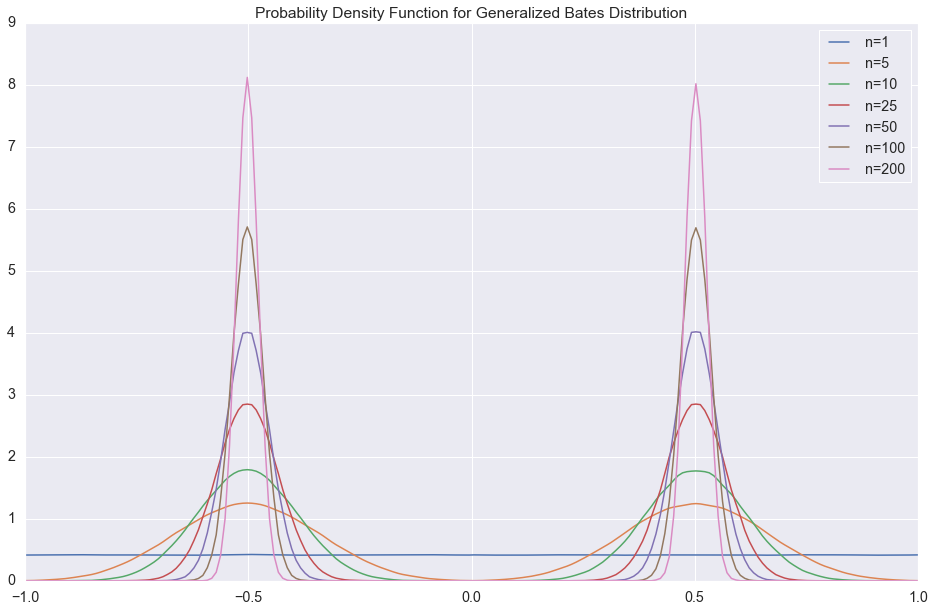

In [5]:
for n in (1, 5, 10, 25, 50, 100, 200):
    kde_L = dens_probas(-1.1,0.1, n)
    kde_R = dens_probas(-0.1,1.1, n)
    xs_L = np.linspace(-1, 0, 101)
    xs_R=np.linspace(0,1,101)
    xs = np.linspace(-1, 1, 202)
    F_L = kde_L(xs_L)
    F_R=kde_R(xs_R)
    F=np.concatenate((F_L, F_R))
    plt.plot(xs, 0.5*F, label=f'n={n}')
plt.legend()
plt.title("Probability Density Function for Generalized Bates Distribution")
plt.show()

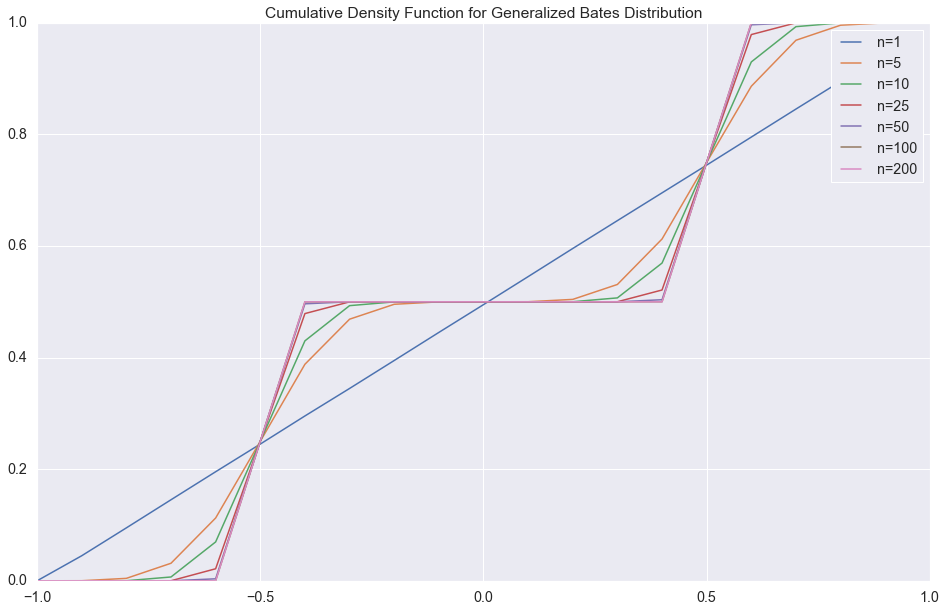

In [7]:
for n in (1, 5, 10, 25, 50, 100, 200):
    xs = np.arange(-1, 1, 0.1)
    F_cdf = np.arange(-1, 1, 0.1)
    for i in range(len(xs)):
        F_cdf[i]=bates_cdf(xs[i],n)
    plt.plot(xs, F_cdf, label=f'n={n}')
plt.legend()
plt.title("Cumulative Density Function for Generalized Bates Distribution")
plt.show()

## Define the Shares for the Left and the Right

In [8]:
def s_L(theta_L, theta_R,n):
    kde_L=dens_probas(-1.1,0,n)
    kde_R=dens_probas(0,1.1,n)
    x = np.linspace(-1, (theta_L+theta_R)/2, 1000)
    if (theta_L+theta_R)/2<=0:
        F=0.5*kde_L(x)
    else:
        F=0.5+0.5*kde_R(x)
    s_l = integrate.simpson(F, x)
    return s_l

In [9]:
print(s_L(-0.5, 0.8, 5))    

0.5756863769613602


In [10]:
n=5
    
xs=np.arange(-1,0.5,0.1)
F=np.arange(-1,0.5,0.1)
theta_R=0
theta_L=-1
for i in range(15):
    F[i]=s_L(theta_L, theta_R,n)
    theta_L+=0.1
   
 

## Check and confirm that Simulated values work corrrectly

In [11]:
s_L(-1,0.8,5)

0.49978213462013943

In [15]:
n=1
kde_L=dens_probas(-1,0,n)
kde_R=dens_probas(0,1,n)
x = np.linspace(-1, -0.5, 1000)
F=0.5*kde_L(x)
s_l = integrate.trapezoid(F, x)
s_l

0.24493967527201463